In [25]:
###### Steps need to follow to build a model#############
#Importing packages
#Reading data
#basic understanding about the data and data types high level
#data imputation 
#seperate data into numerical and categorical
#Co-relation independent variables vs dependent variables
#droping variables if not impacting the target variable
#train test split
#Model creating (fit with training data and predict the test data, score on train and test)
     #charges = age*x1 + sex*x2 + bmi*x3 + smoker*x4 + region*x5 + c
#metrics

In [26]:
#Importing packages

import pandas as pd # data manuplication
import matplotlib.pyplot as plt  #for plots
import seaborn as sns  # seaborn for visualization

In [27]:
#Reading data

filename = 'C:/Users/1022682/Downloads/archive/insurance.csv'
df = pd.read_csv(filename)

In [32]:
#basic understanding about the data and data types high level

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.9,0.0,yes,southwest,16884.92
1,18.0,male,33.8,1.0,no,southeast,1725.55
2,28.0,male,33.0,3.0,no,southeast,4449.46
3,33.0,male,22.7,0.0,no,northwest,21984.47
4,32.0,male,28.9,0.0,no,northwest,3866.86


In [33]:
df.shape

(1342, 7)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 7 columns):
age         1341 non-null float64
sex         1341 non-null object
bmi         1342 non-null float64
children    1341 non-null float64
smoker      1342 non-null object
region      1342 non-null object
charges     1341 non-null float64
dtypes: float64(4), object(3)
memory usage: 73.5+ KB


In [35]:
df.describe()

,age,bmi,children,charges
count,1341.000000,1342.000000,1341.000000,1341.000000
mean,39.202834,30.671311,1.094705,13302.474899
std,14.048977,6.096523,1.204770,12132.258472
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9391.350000
75%,51.000000,34.700000,2.000000,16776.300000
max,64.000000,53.100000,5.000000,63770.430000


In [36]:
df["sex"].value_counts()

male      678
female    663
Name: sex, dtype: int64

In [9]:
df["region"].value_counts()

southeast    366
southwest    326
northwest    325
northeast    325
Name: region, dtype: int64

In [10]:
df["smoker"].value_counts()

no     1066
yes     276
Name: smoker, dtype: int64

In [42]:
#data imputation 
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [39]:
df[df.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges
1338,NaN,male,26.7,0.0,yes,northeast,28101.33
1339,42.0,NaN,40.4,2.0,yes,southeast,43896.38
1340,19.0,female,33.4,NaN,no,southwest,10795.94
1341,51.0,male,30.0,1.0,no,southeast,NaN


In [40]:
df = df.drop([1338 , 1339,1341])

In [41]:
df.at[1340, 'children'] = 0

In [45]:
#seperate data into numerical and categorical

all_columns = list(df.columns)
print(all_columns)
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'children', 'bmi']
target_col = 'charges'

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [46]:
categorical_X = pd.DataFrame()
for i in categorical_cols:
    dummies = pd.get_dummies(df[i])
    categorical_X = pd.concat([categorical_X, dummies], axis=1)
numerical_X = pd.DataFrame(df[numerical_cols])

In [47]:
categorical_X.head()

,female,male,no,yes,northeast,northwest,southeast,southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


In [18]:
numerical_X.head()

,age,children,bmi
0,19.0,0.0,27.9
1,18.0,1.0,33.8
2,28.0,3.0,33.0
3,33.0,0.0,22.7
4,32.0,0.0,28.9


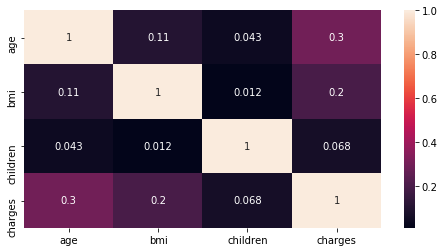

In [48]:
#Co-relation independent variables vs dependent variables

corr = df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr, annot = True)

In [49]:
#df.corr()
df[['age','children','bmi','charges']].corr().iloc[:-1, -1].round(2)

age         0.30
children    0.07
bmi         0.20
Name: charges, dtype: float64

Text(0.5, 0.98, 'Categorical Variables vs charges')

<Figure size 1440x720 with 0 Axes>

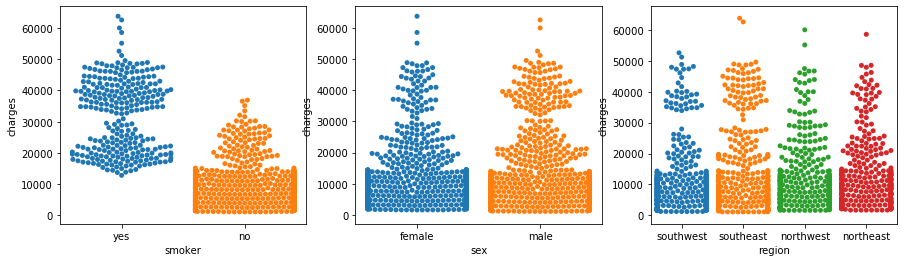

In [50]:
fig = plt.figure(figsize=(20,10))
cat_fig, axes=plt.subplots(1, 3, figsize=(15, 4))

sns.swarmplot(ax=axes[0], x='smoker', y='charges', data=df)
sns.swarmplot(ax=axes[1], x='sex', y='charges', data=df)
sns.swarmplot(ax=axes[2], x='region', y='charges', data=df)

fig.suptitle('Categorical Variables vs charges', fontsize=25)

In [22]:
#droping variables if not impacting the target variable

#As discussed before, this process drops irrelevant features


categorical_X.drop(['female', 'male', 'northeast', 'northwest', 'southeast',
       'southwest'], axis=1, inplace=True)
numerical_X.drop(['children'], axis=1, inplace=True)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [24]:
#train test split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=1)

NameError: name 'X' is not defined

In [ ]:
#Model creating (fit with training data and predict the test data, score on train and test)
linearModel = LinearRegression()

In [ ]:
X = pd.concat([categorical_X, numerical_X], axis=1)
Y = df['charges']

In [ ]:
train_X.head()

In [ ]:
linearModel.fit(train_X, train_Y)

In [ ]:
print("Intercept value:", linearModel.intercept_)
print("Coefficient values:", linearModel.coef_)

In [ ]:
coef_df = pd.DataFrame(list(zip(train_X.columns,linearModel.coef_)), columns = ['Features','Predicted Coeff'])
coef_df

In [ ]:
pred_Y = linearModel.predict(test_X)

In [ ]:
#Plot to see the actual expenses and predicted expenses from Train data set
ax = sns.scatterplot(test_Y,pred_Y)

ax.set_title("Actual Expenses vs Predicted Expenses")
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.show(ax)

In [ ]:
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(test_Y, pred_Y))

In [ ]:
linearModel.score(train_X, train_Y)

In [ ]:
linearModel.score(test_X, test_Y)

In [ ]:
data = {'test':  test_Y,
        'pred': pred_Y
        }

df1 = pd.DataFrame (data, columns = ['test','pred'])



In [ ]:
df1.head()

In [ ]:
sns.lmplot(x ='test', y ='pred', data = df1)

In [ ]:
df.loc[876]

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.boxplot(x="smoker" ,y="charges", data=df, linewidth=2.5)
plt.show()
#conclusion

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
regr.fit(train_X, train_Y)

In [ ]:
regr.score(train_X, train_Y)

In [ ]:
regr.score(test_X, test_Y)

In [ ]:
pred_Y = regr.predict(test_X)

In [ ]:
data = {'test':  test_Y,
        'pred': pred_Y
        }

df1 = pd.DataFrame (data, columns = ['test','pred'])



In [ ]:
df1.head()

In [ ]:
regr.predict([[0,1,28,32.3]])

In [ ]:
df.at[1021,'smoker']